In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD
from keras.initializers import glorot_uniform
from keras.utils import plot_model
import keras.backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import sklearn
from matplotlib.colors import LogNorm
from sklearn.manifold import TSNE
import data
import model
import pickle

Using TensorFlow backend.


In [2]:
batch_size = 32
training_size = 2913
testing_size = 210

train_gen = data.data_gen('dataset/images_train', 'dataset/annotations_train', batch_size=batch_size, one_hot=True)
test_gen = data.data_gen('dataset/images_test', 'dataset/annotations_test', batch_size=batch_size, one_hot=True)

### Model 2020_06_11-11_17_36 - SGD lr=0.0001

In [5]:
m1 = keras.models.load_model('experiments/model.2020_06_11-11_17_36.h5', custom_objects={'loss': model.weighted_categorical_crossentropy([.1 if i==0 else 1 for i in range(21)])})

In [3]:
with open('experiments/history.2020_06_11-11_17_36.dump', 'rb') as file:
    hist1 = pickle.load(file)

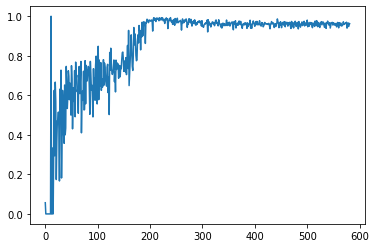

In [9]:
plt.plot(hist1['precision_1'])

### Model 2020_06_11-08_11_59 - SGD lr=0.001

In [10]:
with open('experiments/history.2020_06_11-08_11_59.dump', 'rb') as file:
    hist2 = pickle.load(file)

### Model 2020_06_11-08_05_46- Adam

In [11]:
with open('experiments/history.2020_06_11-08_05_46.dump', 'rb') as file:
    hist3 = pickle.load(file)

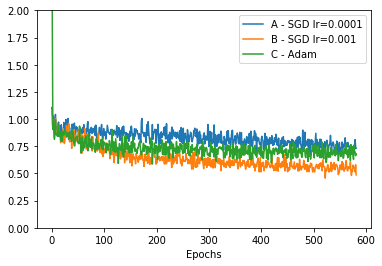

In [38]:
plt.plot(hist1['loss'], label='A - SGD lr=0.0001')
plt.plot(hist2['loss'], label='B - SGD lr=0.001')
plt.plot(hist3['loss'], label='C - Adam')
plt.legend()
plt.xlabel('Epochs')
plt.ylim(ymin=0, ymax=2)
plt.savefig('optim_loss.png', bbox_inches='tight')

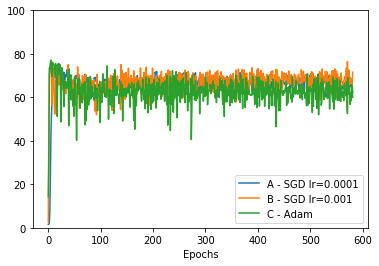

In [39]:
plt.plot(np.array(hist1['accuracy']) * 100, label='A - SGD lr=0.0001')
plt.plot(np.array(hist2['accuracy']) * 100, label='B - SGD lr=0.001')
plt.plot(np.array(hist3['accuracy']) * 100, label='C - Adam')
plt.legend()
plt.xlabel('Epochs')
plt.ylim(ymin=0, ymax=100)
plt.savefig('optim_accuracy.png', bbox_inches='tight')

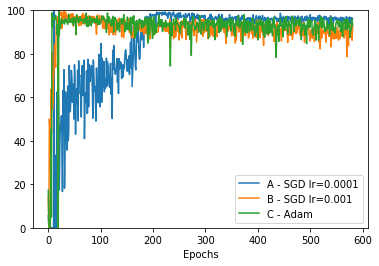

In [40]:
plt.plot(np.array(hist1['precision_1']) * 100, label='A - SGD lr=0.0001')
plt.plot(np.array(hist2['precision_1']) * 100, label='B - SGD lr=0.001')
plt.plot(np.array(hist3['precision_1']) * 100, label='C - Adam')
plt.legend()
plt.xlabel('Epochs')
plt.ylim(ymin=0, ymax=100)
plt.savefig('optim_precision.png', bbox_inches='tight')